<a href="https://colab.research.google.com/github/kokot123-dev/MISP/blob/main/zaj5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 98kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 h

# **PROBLEM**

Dobrać wartości rezystorów aby zminimalizować wartość mocy.

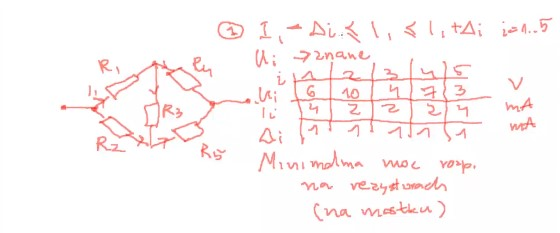




# Kroki analizowania problemu

Identyfikacja zmiennych decyzyjnych

Określenie funkcji celu

Określenie ograniczeń

Rozwiązanie problemu


**Zmienne decyzyjne**

prądy w gałęziach układu (patrz rysunek)

i1, i2, i3, i4, i5


**Funkcja celu**

minimalizacja mocy 

6.0* i1 + 10.0* i2 + 4.0 * i3 + 7.0 * i4 + 3.0 *i5  

**Ograniczenia**

* dopuszczalne wartośći min/max prądów 

3<=i1<=5

1<=i2<=3

1<=i3<=3

1<=i4<=3

3<=i5<=5

* prawo kirchoffa

i5==i3+i2

i1==i3+i4  

i2+i1 == i4+i5

# Rozwiązanie problemu za pomocą biblioteki pulp



In [3]:
from pulp import *
prob = LpProblem("Problem10",LpMinimize)

i1=LpVariable("I_1",3,5)  
i2=LpVariable("I_2",1,3)
i3=LpVariable("I_3",1,3)
i4=LpVariable("I_4",1,3)
i5=LpVariable("I_5",3,5)

prob += 6.0* i1 + 10.0* i2 + 4.0 * i3 + 7.0 * i4 + 3.0 *i5   #min mocy

prob += i5==i3+i2
prob += i1==i3+i4   
prob += i2+i1 == i4+i5   #prawa oczkowe

prob.solve()
print("Status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue, "mA")
print("Moc {} mW  ".format( value(prob.objective)))

r1=6/value(i1)
r2=10/value(i2)
r3=4/value(i3)
r4=7/value(i4)
r5=3/value(i5)
print("R1=",r1,"kOhm","R2=",r2,"kOhm","R3=",r3,"kOhm","R4=",r4,"kOhm","R5=",r5,"kOhm",)

Status: Optimal
I_1 = 3.0 mA
I_2 = 1.0 mA
I_3 = 2.0 mA
I_4 = 1.0 mA
I_5 = 3.0 mA
Moc 52.0 mW  
R1= 2.0 kOhm R2= 10.0 kOhm R3= 2.0 kOhm R4= 7.0 kOhm R5= 1.0 kOhm


# **PROBLEM 2**


Wyzmacz maksymalny prąd w układzie. 

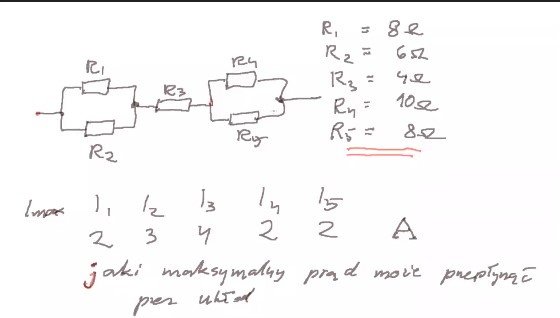

# Kroki analizowania problemu

Identyfikacja zmiennych decyzyjnych

Określenie funkcji celu

Określenie ograniczeń

Rozwiązanie problemu

**Zmienne decyzyjne**

prądy w gałęziach układu (patrz rysunek)

i1, i2, i3, i4, i5

**Funkcja celu**

maksymalizacja prądu 

i3 

**Ograniczenia**

* dopuszczalne wartośći min/max prądów (większe od 0)

0<=i1<=2

0<=i2<=3

0<=i3<=4

0<=i4<=2

0<=i5<=2

* prawo kirchoffa

i3==i1+i2

i3==i5+i4  

* połaczenie równoległe

8.0 * i1  == 6.0 * i2

10.0 * i4 == 8.0 * i5

* maksymalne napiecie dopuszczalne na rezystorach

2.0 * 8.0  >= 8.0 * i1

3.0 * 6.0  >= 6.0 * i2

4.0 * 4.0  >= 4.0 * i3

2.0 * 10.0 >= 10.0 * i4

2.0 * 8.0  >= 8.0 * i5 

In [4]:
from pulp import *
prob = LpProblem("Problem20",LpMaximize)




i1=LpVariable("I_1",0,2)  
i2=LpVariable("I_2",0,3)
i3=LpVariable("I_3",0,4)
i4=LpVariable("I_4",0,2)
i5=LpVariable("I_5",0,2)

prob += i3  #max prad

prob += i3==i1+i2 
prob += i3==i4+i5   #węzły

prob += 8.0*i1  == 6.0*i2
prob += 10.0*i4 == 8.0*i5

prob += 2.0*8.0  >= 8.0*i1
prob += 3.0*6.0  >= 6.0*i2
prob += 4.0*4.0  >= 4.0*i3
prob += 2.0*10.0 >= 10.0*i4
prob += 2.0*8.0  >= 8.0*i5    # ograniczenie max U


prob.solve()
print("Status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue, "A")
print("Prąd {} A  ".format( value(prob.objective)))

Status: Optimal
I_1 = 1.5428571 A
I_2 = 2.0571429 A
I_3 = 3.6 A
I_4 = 1.6 A
I_5 = 2.0 A
Prąd 3.6 A  
